<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import*
from fastai.callbacks.hooks import*

Want to know more?
https://medium.com/analytics-vidhya/image-segmentation-using-fastai-ddded25f811e

In [3]:
URLs.CAMVID

'https://s3.amazonaws.com/fast-ai-imagelocal/camvid'

In [4]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/images')]

In [5]:
path_lbl = path/'labels'
path_img = path/'images'

In [6]:
imageFileNames = get_image_files(path_img)
imageFileNames[:5]

[PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f02760.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08059.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08250.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07020.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_009180.png')]

In [7]:
label_names = get_image_files(path_lbl)
label_names[:5]

[PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f04590_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_08083_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_01380_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03660_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03180_P.png')]

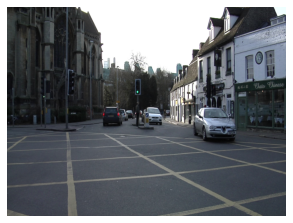

In [11]:
img_f = imageFileNames[5]
img = open_image(img_f)
img.show(figsize=(5,5))

In [ ]:
img.data

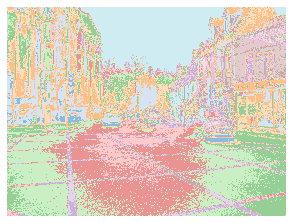

In [16]:
label_img_path = label_names[5]
img = open_mask(img_f)
img.show(figsize=(5,5))

In [17]:
img.data

tensor([[[ 32,  30,  31,  ..., 251, 251, 251],
         [ 32,  30,  30,  ..., 251, 251, 251],
         [ 34,  31,  31,  ..., 250, 250, 250],
         ...,
         [102, 103, 102,  ...,  53,  51,  53],
         [102, 105, 103,  ...,  48,  46,  51],
         [102, 104, 101,  ...,  53,  52,  60]]])

In [19]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

*Create a data bunch.*

In [ ]:
src = (SegmentationItemList
       .from_folder(path_img)
       .split_by_fname_file("valid.txt")
       .label_from_func(get_label_image,  classes=codes))